# 1. Pakiety

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Dane

In [2]:
df26 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-26.csv')
df26.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-26 04:31:30,2691,Chmieleniec,11,Mały Płaszów,2018-07-26 04:30:00,6.352185e+18,6351558574047292418,STOPPING,1,2.0
1,1,2018-07-26 04:31:39,1360,Plac Wszystkich Świętych,8,Bronowice Małe,2018-07-26 04:32:00,6.352185e+18,6351558574047190018,STOPPING,0,14.0
2,1,2018-07-26 04:31:55,392,DH Wanda,52,Czerwone Maki P+R,2018-07-26 04:30:00,NaN,6351558574047652866,PLANNED,1,6.0
3,1,2018-07-26 04:31:58,459,Kombinat,4,Bronowice Małe,2018-07-26 04:30:00,NaN,6351558574047099906,PLANNED,1,7.0
4,1,2018-07-26 04:31:59,442,Wzgórza Krzesławickie,5,Krowodrza Górka,2018-07-26 04:32:00,6.352185e+18,6351558574047128578,STOPPING,0,1.0


# Rozkład spóźnień

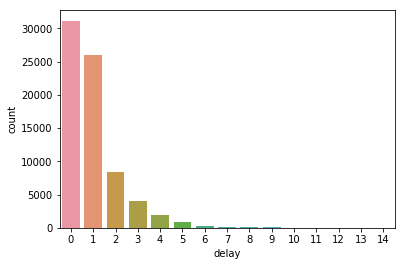

In [3]:
sns.countplot(x='delay', data=df26)

In [4]:
df26.delay.value_counts()

0     31143
1     25956
2      8360
3      4029
4      1960
5       907
6       340
7       166
9        64
8        63
10       43
11       35
13       24
12       12
14        6
Name: delay, dtype: int64

In [5]:
df26.delay.value_counts(normalize = True)

0     0.425986
1     0.355036
2     0.114351
3     0.055110
4     0.026810
5     0.012406
6     0.004651
7     0.002271
9     0.000875
8     0.000862
10    0.000588
11    0.000479
13    0.000328
12    0.000164
14    0.000082
Name: delay, dtype: float64

In [6]:
df26.delay.describe()

count    73108.000000
mean         0.995445
std          1.293580
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: delay, dtype: float64

# Spóźnienia w czasie

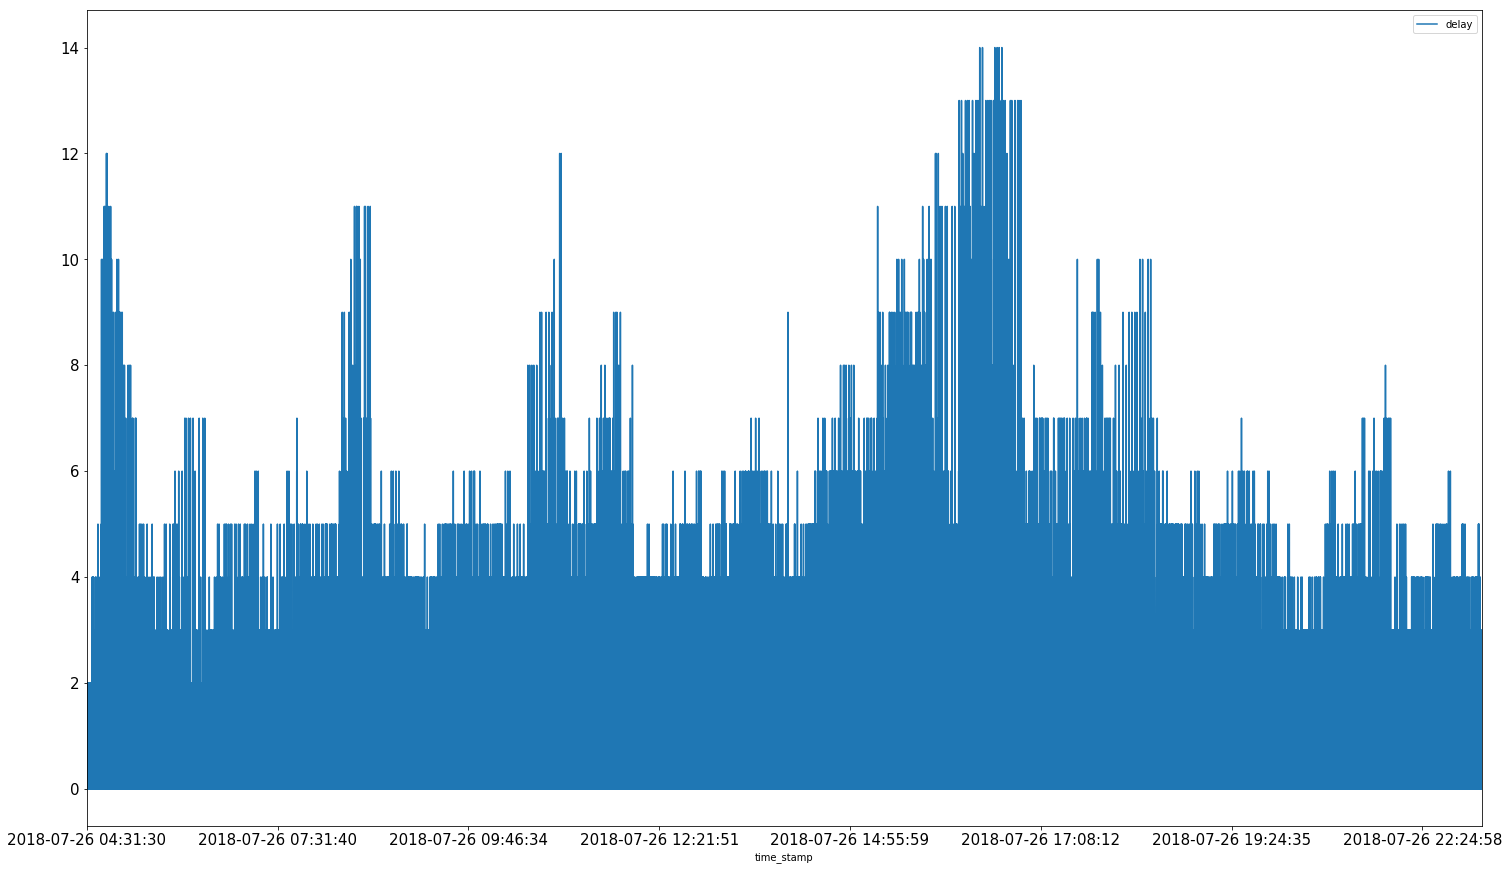

In [7]:
df26.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Rankingi spóźnień na przystankach

In [8]:
stopMeanDelay = df26.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,1.029762
1,Agencja Kraków Wschód,1.495050
2,Bardosa,0.737374
3,Batorego,1.428755
4,Białucha,1.127941
5,Bieńczycka,0.530827
6,Bieżanowska,0.978000
7,Biprostal,0.949742
8,Blokowa,1.360000
9,Borek Fałęcki,0.228571


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,153.000000
mean,0.939754
std,0.357900
min,0.037037
25%,0.724490
50%,0.945813
75%,1.180108
max,2.164021


In [11]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.164021
95,Plaza,1.620690
79,Ofiar Dąbia,1.570292
75,Nowosądecka,1.564470
45,Hala Targowa,1.500000
1,Agencja Kraków Wschód,1.495050
48,Kabel,1.477799
88,Piaski Nowe,1.466851
71,Mrozowa,1.460000
72,Muzeum Lotnictwa,1.459064


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.164021
95,Plaza,1.620690
79,Ofiar Dąbia,1.570292
75,Nowosądecka,1.564470
45,Hala Targowa,1.500000
1,Agencja Kraków Wschód,1.495050
48,Kabel,1.477799
88,Piaski Nowe,1.466851
71,Mrozowa,1.460000
72,Muzeum Lotnictwa,1.459064


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
23,Cmentarz Rakowicki,0.037037
25,Czerwone Maki P+R,0.102881
14,Bronowice Małe,0.151163
20,Cichy Kącik,0.153061
67,Mały Płaszów,0.165468
145,Wzgórza Krzesławickie,0.171429
59,Krowodrza Górka,0.196429
9,Borek Fałęcki,0.228571
138,Walcownia,0.326531
76,Nowy Bieżanów P+R,0.330049


# Ranking spóźnień dla danych linii

In [14]:
lineMeanDelay = df26.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.989140
1,1,Wzgórza K.,0.901589
2,2,Cm. Rakowicki,0.403377
3,2,Salwator,0.561321
4,3,Dworzec Tow.,0.899160
5,3,Krowodrza Górka,0.598140
6,3,Nowy Bieżanów P+R,0.990143
7,4,Bronowice Małe,0.603598
8,4,Kombinat,0.403846
9,4,Wzgórza K.,0.978861


In [16]:
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.311545
2,2,Cm. Rakowicki,0.403377
8,4,Kombinat,0.403846
3,2,Salwator,0.561321
5,3,Krowodrza Górka,0.598140
7,4,Bronowice Małe,0.603598
10,5,Krowodrza Górka,0.607229
16,9,Mistrzejowice,0.628348
17,9,Nowy Bieżanów P+R,0.656393
29,18,Czerwone Maki P+R,0.676543


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
40,22,Walcownia,1.947727
31,19,Borek Fałęcki,1.642157
38,22,Borek Fałęcki,1.629082
18,10,Kopiec Wandy,1.486525
13,6,Salwator,1.459392
41,24,Bronowice Małe,1.433771
23,13,Nowy Bieżanów P+R,1.419794
39,22,Kombinat,1.307692
42,24,Kurdwanów P+R,1.276281
43,44,Bronowice,1.175182


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.311545
2,2,Cm. Rakowicki,0.403377
8,4,Kombinat,0.403846
3,2,Salwator,0.561321
5,3,Krowodrza Górka,0.598140
7,4,Bronowice Małe,0.603598
10,5,Krowodrza Górka,0.607229
16,9,Mistrzejowice,0.628348
17,9,Nowy Bieżanów P+R,0.656393
29,18,Czerwone Maki P+R,0.676543


In [19]:
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.989140,1 Salwator
1,1,Wzgórza K.,0.901589,1 Wzgórza K.
2,2,Cm. Rakowicki,0.403377,2 Cm. Rakowicki
3,2,Salwator,0.561321,2 Salwator
4,3,Dworzec Tow.,0.899160,3 Dworzec Tow.
5,3,Krowodrza Górka,0.598140,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,0.990143,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.603598,4 Bronowice Małe
8,4,Kombinat,0.403846,4 Kombinat
9,4,Wzgórza K.,0.978861,4 Wzgórza K.


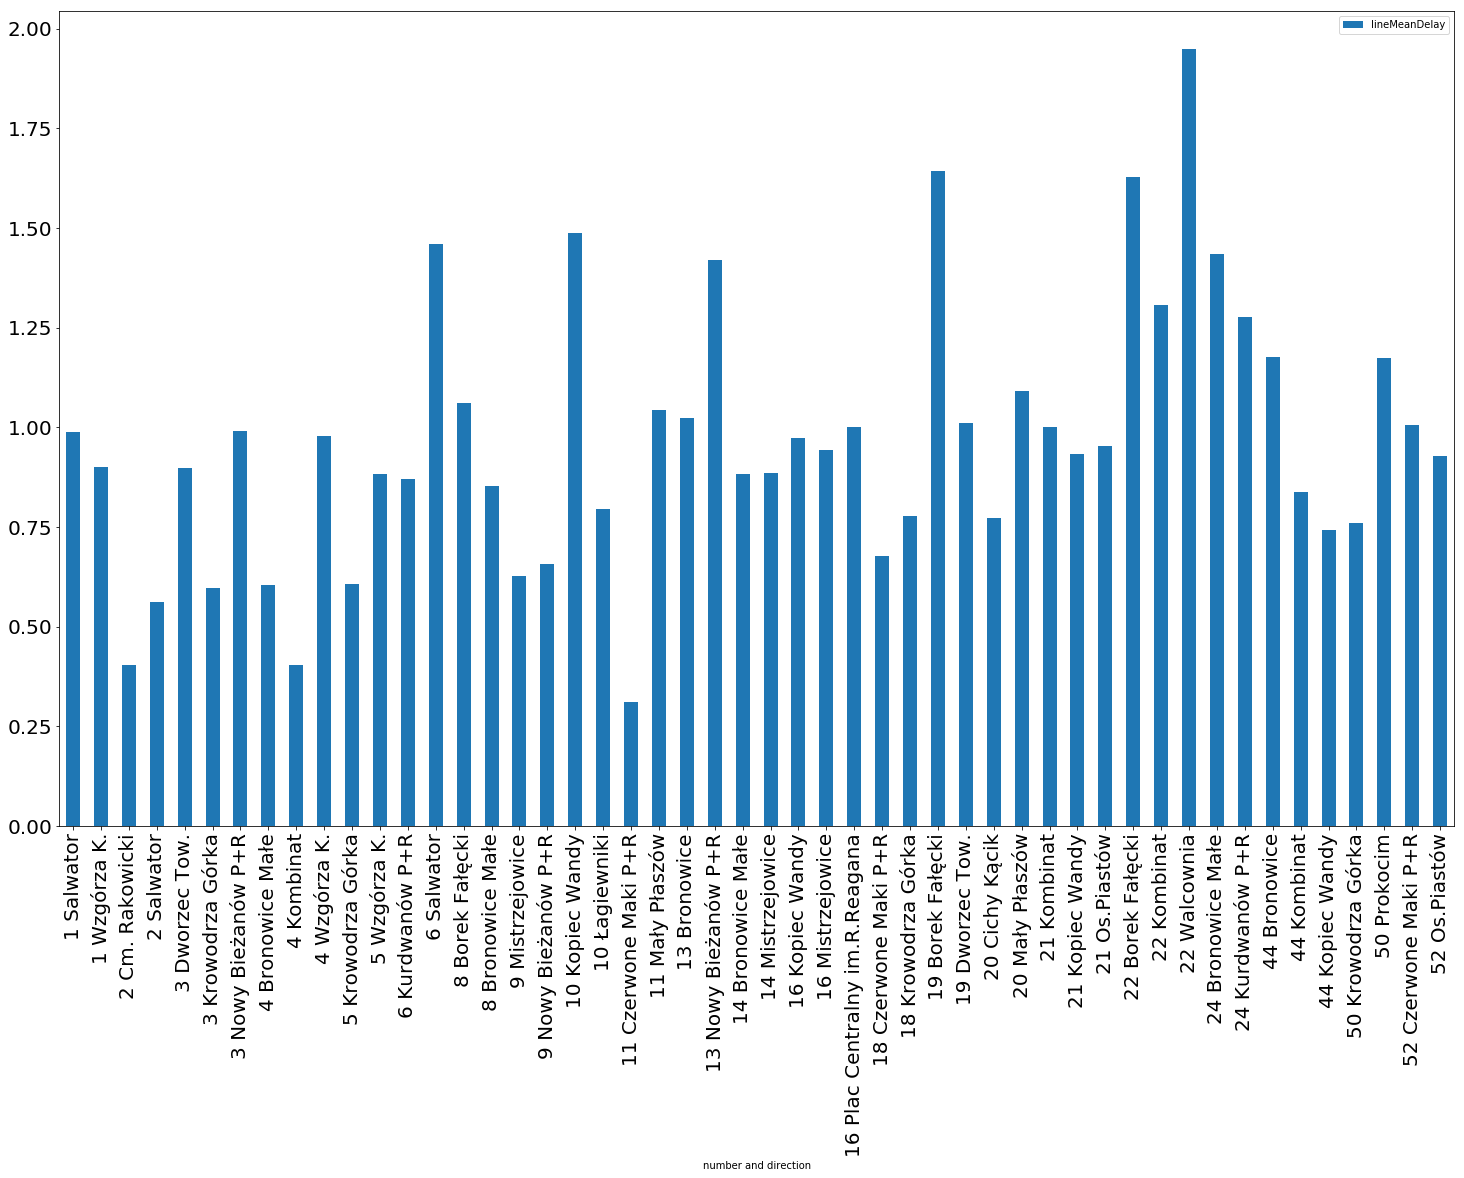

In [21]:
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Model uczenia maszynowego

In [22]:
df26.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#df26.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis = 1).head().factorize()[0]

In [24]:
df26['plannedTime'] = pd.to_datetime (df26['plannedTime'])
df26[['plannedTime']].info()

df26['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73108 entries, 0 to 73107
Data columns (total 1 columns):
plannedTime    73108 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 571.2 KB


16    4559
15    4535
8     4522
17    4518
7     4486
18    4390
9     4284
6     4272
14    4069
19    3970
10    3847
13    3834
11    3830
12    3817
20    3432
21    3051
5     2975
22    2850
23    1411
4      446
0       10
Name: plannedTime, dtype: int64

In [25]:
df26['delay_secs'] = df26['delay'].map(lambda x: x*60)
df26['direction_cat'] = df26['direction'].factorize()[0]
df26['vehicleId'].fillna(-1, inplace = True)
df26['seq_num'].fillna(-1, inplace = True)

def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
df26['number_direction_id'] = df26.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])
df26['stop_direction_id'] = df26.apply(gen_id_stop_direction, axis = 1).factorize()[0]

feats1 = [
    'number'
]
X1 = df26[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df26[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df26[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df26[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df26[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df26[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df26[ feats7 ].values

y = df26['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [26]:
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df26 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [27]:
df26

,np.mean
feats1,53.078118
feats2,52.002295
feats3,49.316307
feats4,47.338965
feats5,46.426719
feats6,46.514335
feats7,46.483185


In [28]:
minVal26 = df26.min()
 
print('Minimum value is: ')
print(minVal26)


minValInd26 = df26.idxmin()
 
print("Min value is at row index position:")
print(minValInd26)

Minimum value is: 
np.mean    46.426719
dtype: float64
Min value is at row index position:
np.mean    feats5
dtype: object


In [29]:
feats5

['number', 'stop', 'direction_cat', 'vehicleId', 'seq_num']

In [30]:
np.std(scores5)

3.1636044557884175